<a href="https://colab.research.google.com/github/SaymaC/FreeCodeCamp-MLProject-Linear-Regression-Health-Costs-Calculator/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-09-27 09:45:59--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2025-09-27 09:45:59 (128 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Generate dummies for sex
dataset = pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix="sex")],axis=1)
dataset.drop('sex', axis=1, inplace=True)

# Generate dummies for smoker
dataset = pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix="smoker")],axis=1)
dataset.drop('smoker', axis=1, inplace=True)

# Generate dummies for region
dataset = pd.concat([dataset,pd.get_dummies(dataset['region'],prefix="region")],axis=1)
dataset.drop('region', axis=1, inplace=True)
dataset

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,False,True,True,False,False,True,False,False
1334,18,31.9,0,2205.98,True,False,True,False,True,False,False,False
1335,18,36.9,0,1629.83,True,False,True,False,False,False,True,False
1336,21,25.8,0,2007.95,True,False,True,False,False,False,False,True


In [4]:
x_columns = dataset.columns.drop('expenses')
x = dataset[x_columns].values.astype('int')
y = dataset['expenses'].values

In [5]:
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

In [6]:
# Build the neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error", "mean_squared_error"], optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, verbose=1, mode='auto', restore_best_weights=True)

# Add train_dataset and test_dataset variables
train_dataset, test_dataset, train_labels, test_labels = train_test_split(x, y, train_size=0.8)

model.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), callbacks=[monitor], verbose=2, epochs=1000)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
34/34 - 2s - 50ms/step - loss: 13324.6631 - mean_absolute_error: 13324.6631 - mean_squared_error: 321277088.0000 - val_loss: 13038.1631 - val_mean_absolute_error: 13038.1631 - val_mean_squared_error: 327642112.0000
Epoch 2/1000
34/34 - 0s - 4ms/step - loss: 13286.8037 - mean_absolute_error: 13286.8037 - mean_squared_error: 320224544.0000 - val_loss: 12994.6318 - val_mean_absolute_error: 12994.6318 - val_mean_squared_error: 326421856.0000
Epoch 3/1000
34/34 - 0s - 5ms/step - loss: 13227.6309 - mean_absolute_error: 13227.6309 - mean_squared_error: 318536320.0000 - val_loss: 12913.0059 - val_mean_absolute_error: 12913.0059 - val_mean_squared_error: 324138272.0000
Epoch 4/1000
34/34 - 0s - 12ms/step - loss: 13110.4844 - mean_absolute_error: 13110.4844 - mean_squared_error: 315250656.0000 - val_loss: 12755.6436 - val_mean_absolute_error: 12755.6436 - val_mean_squared_error: 319768352.0000
Epoch 5/1000
34/34 - 0s - 10ms/step - loss: 12900.2158 - mean_absolute_error: 12900.2158 -

9/9 - 0s - 5ms/step - loss: 2071.0430 - mean_absolute_error: 2071.0430 - mean_squared_error: 24581994.0000
Testing set Mean Abs Error: 2071.04 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


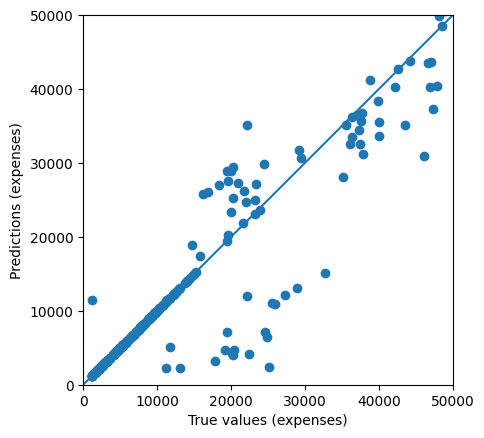

In [7]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
